# Machine Learning and Data Analysis
----------------------------------------------
### *Session 2.1*


```
3rd October, 2023
Anna Pallarès López
Computer Engineering Master's

```



### 1. Generate data

In [ ]:
# import libraries

import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# random generator (used to obtain the same random value)

np.random.seed(13)

In [ ]:
# define a funtion

def oracle(x):
  #return x**2
  return np.abs(np.abs(x-.4)-.2)+x/2-.1 # piecewise
  # return np.sinc(3*x) # exponential function
  # the idea is that we can put whatever we want

In [ ]:
# define the boundaries of the funcion
n = 1000
sigma = 0 # noise - choice

x = np.random.rand(n)
y = oracle(x) + sigma*np.random.rand(n) # + = we add some noise

x = np.asmatrix(x).transpose() # it becomes a matrix
y = np.asmatrix(y).transpose() # it becomes a matrix


no = 1000 # number of samples

xo = np.linspace(0,1,no)
yo = oracle(xo)
xo = np.asmatrix(xo).transpose() # it becomes a matrix
yo = np.asmatrix(yo).transpose() # it becomes a matrix

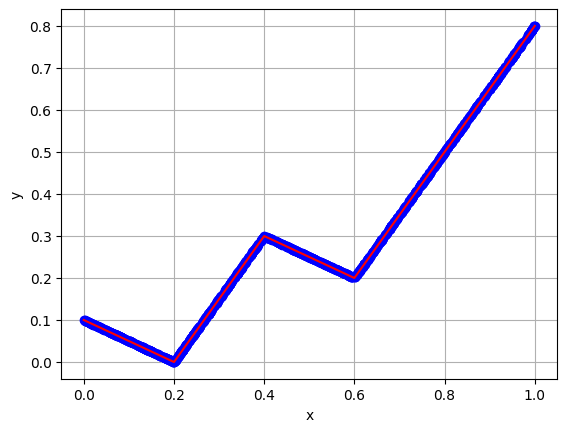

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xo,yo,'r')
ax.set(xlabel='x',ylabel='y')
ax.grid()

### Learn from data. Changing p manually

In [ ]:
# Structural Risk Minimisation, SRM

p = 12 # large enough -> Theory
n_lam = 30
n_ns = 30
err_best = np.inf
for lam in np.logspace(-5,3,n_lam):  # -> Theory
  err = 0
  for ns in range(0,n_ns): # -> Theory
    xl, xv, yl, yv = train_test_split(x, y, test_size = .2)
    XL = nml.ones((xl.shape[0],1))
    XV = nml.ones((xv.shape[0],1))
    for i in range(1,p+1):
      XL = np.concatenate((XL,np.power(xl,i)),axis=1)
      XV = np.concatenate((XV,np.power(xv,i)),axis=1)
    M = nml.zeros((p+1,p+1))
    for i in range(2,p+1):
      for j in range(2,p+1):
        M[i,j] = i*(i-1)*j*(j-1)/(i+j-3)
    a = np.linalg.solve(np.matmul(np.transpose(XL),XL)+lam*M,np.matmul(np.transpose(XL),yl)) # -> Theory
    yp = np.matmul(XV,a)
    err += np.mean(np.abs(yp-yv))
  err /= n_ns
  if (err_best > err):
    err_best = err
    lam_best = lam

In [ ]:
lam = lam_best
X = nml.ones((n,1))
XO = nml.ones((no,1))

for i in range(1, p+1):
  X = np.concatenate((X, np.power(x,i)), axis=1)
  XO = np.concatenate((XO, np.power(xo,i)), axis=1)
M = nml.zeros((p+1,p+1))
for i in range(2,p+1):
  for j in range(2,p+1):
    M[i,j] = i*(i-1)*j*(j-1)/(i+j-3)
a = np.linalg.solve(np.matmul(np.transpose(X),X),np.matmul(np.transpose(X),y))
yp = np.matmul(XO,a)
err = np.mean(np.abs(yp-yo))
err

0.0044161619700915315

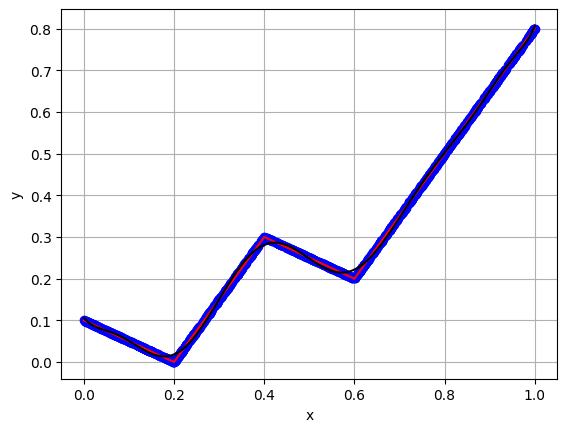

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xo,yo,'r')
ax.plot(xo,yp,'k')
ax.set(xlabel='x', ylabel='y')
ax.grid()

The red line represents how the system works. We want to understand it as a machine learners.
We can estimate the error between the data and the model